# Movie Data Correlation Project

## Importing liberaries

In [1]:
# importing all the necessary liberaries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import plotly.figure_factory as ff
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [ ]:
# optional : displays all the row in the dataset but take more time to process 'good for viewing and exploring data'
pd.set_option('display.max_rows', None)

## 1. Data Exploration
### - Viewing data ' Scrolling though the data to find any errors, nulls, and take a brief understaning of the data'

In [2]:
# Reading the file 'file is a csv file' 
# Viewing it either by head or viewing it all by setting the above option first then going though the data

df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### - Viewing data type ' See the types of the data to see of it matches its a attribute'

In [3]:
# Viewing the data types

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


### -  Finding all null values ' To see if it will make our data bias or removing it would make the data uncredible  '

In [4]:
# looping thourgh the columns to find any missing data and this 'for loop' gives us a percentage of the missing values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
# Summing the null values for each column aslo identifies null using another way

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

### - Finding all duplicates

In [6]:
# Looking for movie names with the same name though the data

duplicateDFRow = df[df.duplicated('name')]
print(duplicateDFRow)

                   name rating      genre  year  \
1360           The Bear     PG  Adventure  1988   
1836            Impulse      R      Crime  1990   
2022           Paradise  PG-13      Drama  1991   
2104      Forever Young     PG      Drama  1992   
2368        Dream Lover      R      Drama  1993   
...                 ...    ...        ...   ...   
7526            The Kid      R  Biography  2019   
7529       Child's Play      R      Drama  2019   
7536              Shaft      R     Action  2019   
7556  After the Wedding  PG-13      Drama  2019   
7623        The Captain    NaN     Action  2019   

                               released  score    votes             director  \
1360   October 27, 1989 (United States)    7.7  17000.0  Jean-Jacques Annaud   
1836      April 6, 1990 (United States)    5.7   1200.0         Sondra Locke   
2022    October 4, 1991 (United States)    6.7   2700.0  Mary Agnes Donoghue   
2104  December 16, 1992 (United States)    6.3  45000.0          St

### - Findings from exploring the data

1. Release year column and year column are differnet in some rows need to make a new column for the corret year.
2. Data type needs adjustments.
3. Found nulls 'small amount of missing data would not affect the analysis if removed'. 
4. Found duplicates 'Removing them to insure credibilty'.

## 2. Data Cleaning
### - Droping the null values found to ensure credability of the data set

In [7]:
# Drops all row with null values

df = df.dropna()

### - Removing duplicates

In [8]:
# Removing all unwanted duplicates

df = df.drop_duplicates('name')

In [9]:
# Viewing that all duplicates have been removed

duplicateDFRow = df[df.duplicated('name')]
print(duplicateDFRow)

Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime]
Index: []


### - Changing data type , so the data is simpler to deal with

In [10]:
# Changing budget data type from float64 to int64

df['budget'] = df['budget'].astype('int64')

# Changing gross data type from float64 to int64

df['gross'] = df['gross'].astype('int64')

# Changing runtime data type from float64 to int64

df['runtime'] = df['runtime'].astype('int64')

# Changing votes data type from float64 to int64

df['votes'] = df['votes'].astype('int64')

### - Making a new column for the correct year

In [11]:
# Works but when I run to check the data it have some issues 'Null Values'

df['year_correct'] = df['released'].astype(str).str.extract(r',.(\b\d+)')

In [12]:
# Checking data found 14 null values

df.isnull().sum()

name             0
rating           0
genre            0
year             0
released         0
score            0
votes            0
director         0
writer           0
star             0
country          0
budget           0
gross            0
company          0
runtime          0
year_correct    14
dtype: int64

In [13]:
# To check what is the cause for the null values in the year correct from this line of code

df1 = df[df.isna().any(axis=1)]
print (df1)

                             name     rating      genre  year  \
312          Five Days One Summer         PG      Drama  1982   
449                 Getting It on          R     Comedy  1983   
467          My Brother's Wedding  Not Rated      Drama  1983   
800               O.C. and Stiggs          R     Comedy  1985   
1173  The House on Carroll Street         PG   Thriller  1987   
1212                 Five Corners          R      Crime  1987   
1404                Stormy Monday          R      Crime  1988   
1819        Come See the Paradise          R      Drama  1990   
2029                  Liebestraum          R    Mystery  1991   
2318                  Killing Zoe          R      Crime  1993   
2319                       Cronos          R    Fantasy  1993   
2816            The White Balloon    Unrated      Drama  1995   
4187                       Dahmer          R  Biography  2002   
5833                   Hatchet II          R     Action  2010   

                        

In [ ]:
# Found that not all the release data have a ',' before the year

In [14]:
# The best code from my point of view for the desired usage

df['year_correct'] = df['released'].str.extract(r'(\d{4})').astype(int)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [15]:
# Checking data found 0 null values

df.isnull().sum()

name            0
rating          0
genre           0
year            0
released        0
score           0
votes           0
director        0
writer          0
star            0
country         0
budget          0
gross           0
company         0
runtime         0
year_correct    0
dtype: int64

In [16]:
# To make sure that there is no null values

df1 = df[df.isna().any(axis=1)]
print (df1)

Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime, year_correct]
Index: []


In [17]:
# Checking if the year and correct_year column are equal by using correlation methode

df.corr()

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.061236,0.207542,0.326118,0.271863,0.075414,0.998707
score,0.061236,1.000000,0.473250,0.071325,0.222235,0.413459,0.066723
votes,0.207542,0.473250,1.000000,0.438567,0.618162,0.348798,0.204546
budget,0.326118,0.071325,0.438567,1.000000,0.737723,0.317912,0.318617
gross,0.271863,0.222235,0.618162,0.737723,1.000000,0.276189,0.266149
runtime,0.075414,0.413459,0.348798,0.317912,0.276189,1.000000,0.075648
year_correct,0.998707,0.066723,0.204546,0.318617,0.266149,0.075648,1.000000


## 3. Descriptive Analysis

### - Steps
1. View all the measures.
2. Find correlation between the data.
3. Making some visualization of the attributes to show trends, correlations, and comparing some attributes.
4. Conculsion on findings.

### I - Measure Viewing
#### - Viewing all data measures

In [18]:
# This code makes the float numbers more readable in the describe methode below

pd.options.display.float_format = "{:.1f}".format

In [19]:
# Getting an idea of the numerical values in our dataset

df.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
year,5336.0,2001.5,10.5,1980.0,1993.0,2002.0,2010.0,2020.0
score,5336.0,6.4,1.0,1.9,5.8,6.5,7.1,9.3
votes,5336.0,114229.7,183538.3,195.0,19000.0,52000.0,128000.0,2400000.0
budget,5336.0,35649050.4,41241714.7,6000.0,10000000.0,21000000.0,45000000.0,356000000.0
gross,5336.0,101592426.2,184167193.6,309.0,10622833.8,35927567.0,110353970.0,2847246203.0
runtime,5336.0,108.1,18.1,63.0,95.0,105.0,118.0,271.0
year_correct,5336.0,2001.7,10.5,1980.0,1993.0,2002.0,2011.0,2020.0


In [ ]:
# Some conclusions

# 1. The studied time lapse goes from 1980 to 2020.
# 2. The average film duration is 2 h 33 min.

In [20]:
# Converting the year_correct to string to get the most frequent year with releaseed movies

df['year_correct'] = df['year_correct'].astype(str)

In [21]:
# Getting an idea of the Object values in our dataset

df.describe(include = ['O']).T

,count,unique,top,freq
name,5336,5336,The Shining,1
rating,5336,10,R,2557
genre,5336,15,Comedy,1483
released,5336,2546,"August 26, 2016 (United States)",7
director,5336,2045,Woody Allen,33
writer,5336,3178,Woody Allen,32
star,5336,1830,Nicolas Cage,39
country,5336,50,United States,4251
company,5336,1464,Universal Pictures,328
year_correct,5336,41,2002,167


In [ ]:
# Some Conclusions

# 1. Highest counts for rating is R rated
# 2. Highest counts for genre is Comedy 
# 3. Woody Allen directed 33 movies 
# 4. Nicolas Cage made 39 movies
# 5. Most releases movies was in 2002 with 167 movies in one year

In [22]:
# Converting the year_correct to int64 to its original type

df['year_correct'] = df['year_correct'].astype(int)

In [23]:
# To reset all the formats displayed use this code

pd.reset_option('all')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\_config\config.py:653: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\_config\config.py:653: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


### II - Correlation

#### - Viewing correlation between the data 'Numercial data'

In [24]:
# Looking at Correlation 
# Note: methodes of correlation are pearson (default), kendall, and spearman 

df.corr()

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.061236,0.207542,0.326118,0.271863,0.075414,0.998707
score,0.061236,1.000000,0.473250,0.071325,0.222235,0.413459,0.066723
votes,0.207542,0.473250,1.000000,0.438567,0.618162,0.348798,0.204546
budget,0.326118,0.071325,0.438567,1.000000,0.737723,0.317912,0.318617
gross,0.271863,0.222235,0.618162,0.737723,1.000000,0.276189,0.266149
runtime,0.075414,0.413459,0.348798,0.317912,0.276189,1.000000,0.075648
year_correct,0.998707,0.066723,0.204546,0.318617,0.266149,0.075648,1.000000


In [ ]:
# Shows us high correlation between budget and gross and some what high correlation between votes and gross

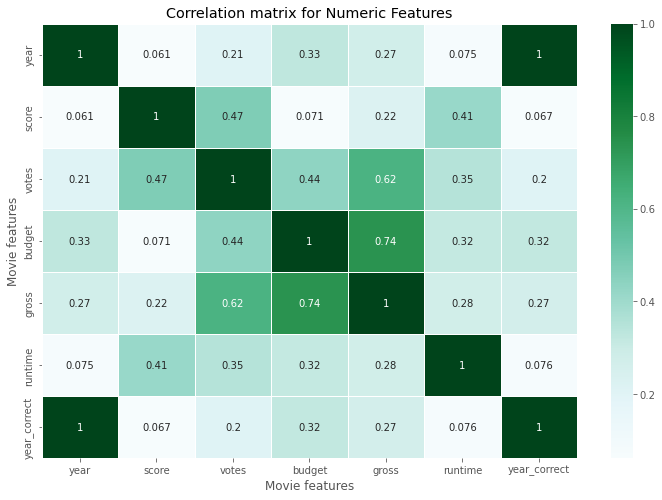

In [25]:
# We can also view the correlation in a HeatMap to gives us even more insights

corma = df.corr()

sns.heatmap(corma, linecolor='white',linewidths=1 , annot = True, cmap="BuGn")

plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

plt.show()

In [ ]:
# Shows us high correlation between budget and gross and some what high correlation between votes and gross

#### - Viewing correlation between the data 'All data'

In [26]:
# We can use this for loop as a way to assign a random unique numerric value to the object type columns

df_num = df.copy()

for coln in df_num.columns:
    if (df_num[coln].dtype == 'object' ):
        df_num[coln] = df_num[coln].astype('category') # changes type to category
        df_num[coln] = df_num[coln].cat.codes  # gives standardaized random numbers to each object in the column 

df_num

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,4692,6,6,1980,1297,8.4,927000,1779,2809,696,46,19000000,46998772,1416,146,1980
1,3929,6,1,1980,1120,5.8,65000,1566,1147,214,47,4500000,58853106,449,104,1980
2,3641,4,0,1980,1352,8.7,1200000,752,1800,1149,47,18000000,538375067,939,124,1980
3,204,4,4,1980,1120,7.7,221000,884,1400,1465,47,3500000,83453539,1100,88,1980
4,732,6,4,1980,1163,7.3,108000,715,347,271,47,6000000,39846344,1075,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,900,6.6,140000,16,2369,1797,47,90000000,426505244,449,124,2020
7649,3556,4,0,2020,709,6.5,102000,847,2288,147,47,85000000,319715683,1100,99,2020
7650,1153,4,1,2020,900,5.6,53000,1792,2804,1461,47,175000000,245487753,1387,101,2020
7651,3978,4,1,2020,754,6.8,42000,294,2070,637,6,135000000,111105497,12,100,2020


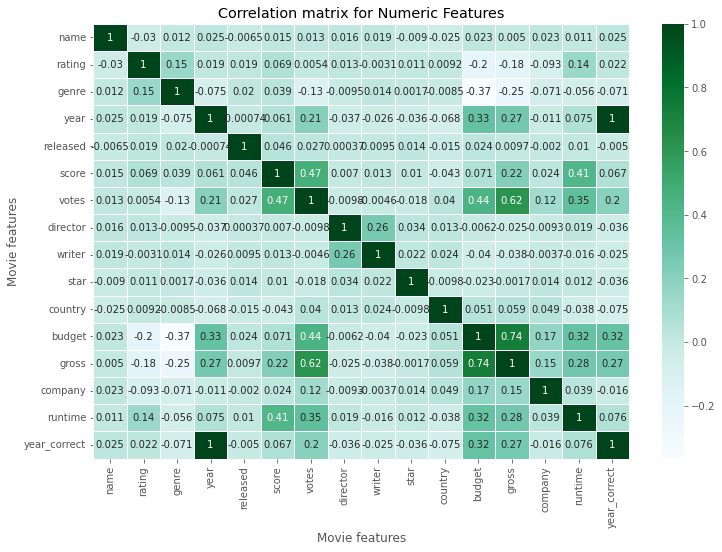

In [27]:
# We can also view the correlation in a HeatMap to gives us even more insights

corma = df_num.corr()

sns.heatmap(corma, linecolor='white',linewidths=1 , annot = True, cmap="BuGn")

plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

plt.show()

In [ ]:
# Shows us high correlation between budget and gross and some what high correlation between votes and gross

#### - Viewing correlation between all the data by another way which is by using 'unstack'

In [28]:
# Using unstacking, gives an over view to all the data 

cormax = df_num.corr()
cormaxstack = cormax.unstack()
scmstack = cormaxstack.sort_values()
scmstack

genre         budget         -0.366326
budget        genre          -0.366326
genre         gross          -0.246023
gross         genre          -0.246023
rating        budget         -0.202192
                                ...   
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
Length: 256, dtype: float64

In [29]:
# Show us the highest data correlation (some conditions to get the answer faster)

scmstack[((scmstack) > 0.5) & ((scmstack) < 1.0)].sort_values(ascending = False)

year          year_correct    0.998707
year_correct  year            0.998707
gross         budget          0.737723
budget        gross           0.737723
votes         gross           0.618162
gross         votes           0.618162
dtype: float64

In [ ]:
# Votes and Budget has high correlation with gross 
# Shows us that the update we made have only 0.01 error which is acceptable

### III - Data Visualization
#### - Ploting attributes togther to get a look at the dataset

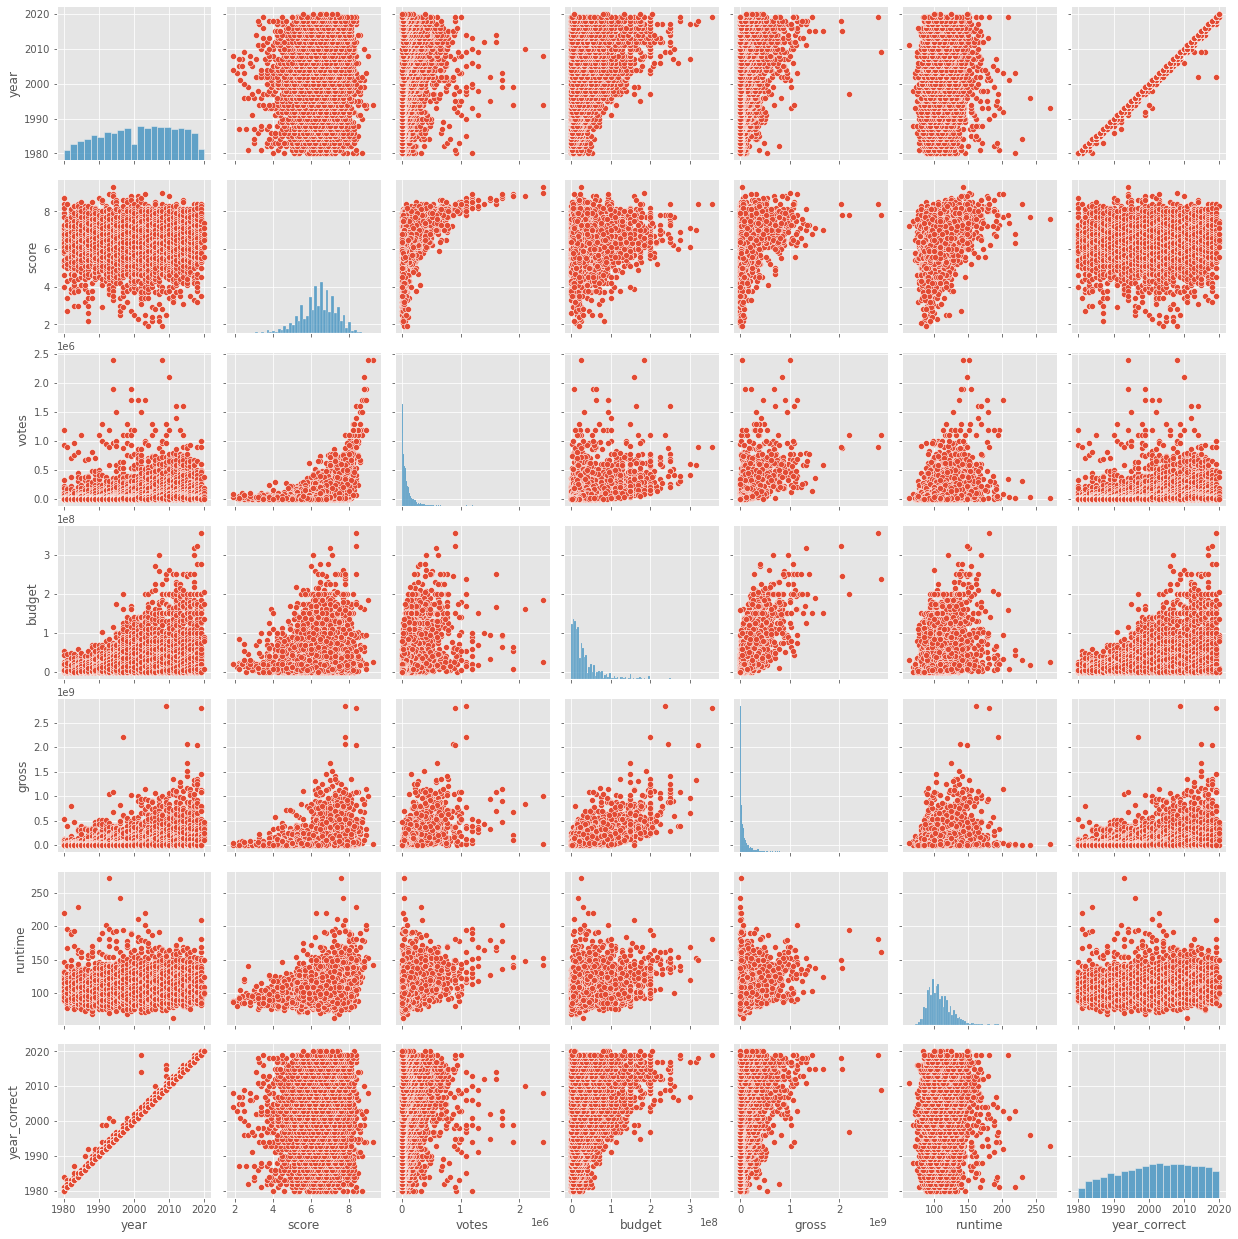

In [30]:
# An overview to all the vizualiztion between various attributes

sns.pairplot(df,diag_kind ='hist')

#### - Ploting the two highest correlation found from the data set

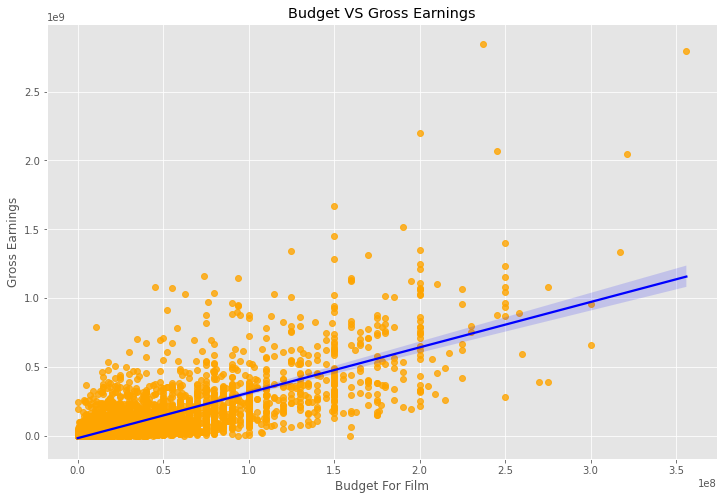

In [31]:
# Plot the Budget Vs Gross usnig Seaborn

sns.regplot(x='budget',y='gross',data=df, scatter_kws = {'color' : 'orange'}, line_kws = {'color' : 'blue'})

plt.title('Budget VS Gross Earnings')
plt.xlabel('Budget For Film')
plt.ylabel('Gross Earnings')

plt.show()

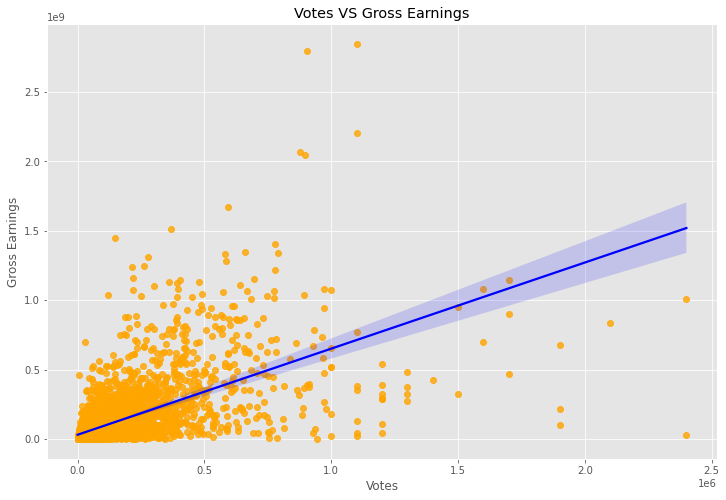

In [32]:
# Plot the Votes Vs Gross usnig Seaborn

sns.regplot(x='votes',y='gross',data=df, scatter_kws = {'color' : 'orange'}, line_kws = {'color' : 'blue'})

plt.title('Votes VS Gross Earnings')
plt.xlabel('Votes')
plt.ylabel('Gross Earnings')

plt.show()

#### - Comparing  Top 10 Companies by Budget and Gross

In [33]:
# First we willmake a new dataframe for the company's budget and gross sum and sorting them

com = df.groupby('company')['budget','gross'].sum().sort_values(by = 'gross', ascending = False)
com.head(10) 

# Second we will reset the index and take only the top 10 comapnies

top10c = com.reset_index()
top10c = top10c.head(10)
top10c

C:\Users\muhan\AppData\Local\Temp\ipykernel_9692\3344905758.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  com = df.groupby('company')['budget','gross'].sum().sort_values(by = 'gross', ascending = False)


,company,budget,gross
0,Warner Bros.,19149300000,53402787586
1,Universal Pictures,15824130001,50762944661
2,Columbia Pictures,15011107000,40870093831
3,Twentieth Century Fox,11339600000,39333826704
4,Paramount Pictures,13323450000,38995978170
5,Walt Disney Pictures,9876700000,32859517114
6,New Line Cinema,5396200000,18774065284
7,Marvel Studios,2444000000,13546776896
8,DreamWorks Animation,3344000000,11873612858
9,Dreamworks Pictures,3702700000,10924475124


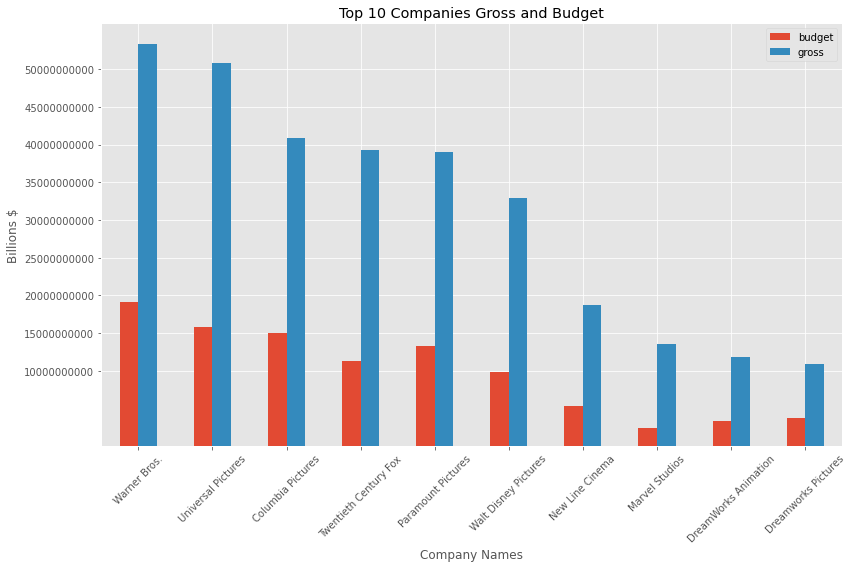

In [34]:
# Ploting the Top 10 Companies by Gross and Budget

ax = top10c.plot.bar(x ='company', rot = 0 )

# Lables and Title

plt.title("Top 10 Companies Gross and Budget")
plt.xlabel("Company Names")
plt.ylabel("Billions $")

# Defining the x-axis values to make it clear

plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9] , rotation = '45')

# This code is for changing the values of the axis so it can be readable to the audiance

plt.yticks(range(10000000000, 55000000000, 5000000000))
vals = ax.get_yticks()

# Changing the format of the valuesin the y-axis

ax.set_yticklabels(['{:.0f}'.format(x) for x in vals]) 

plt.tight_layout()
plt.show()

In [ ]:
# Show how the budget vs gross for each company and how they earned from there movies 

#### - Top 10 Companies with the most movie releases 

In [35]:
# Making a new dataframe for the top 10 companies with the most movie releases

company = df['company'].value_counts()
company = pd.DataFrame(company) 
company = company.head(10) 
company

,company
Universal Pictures,328
Columbia Pictures,295
Warner Bros.,294
Paramount Pictures,274
Twentieth Century Fox,207
New Line Cinema,151
Touchstone Pictures,104
Walt Disney Pictures,104
Metro-Goldwyn-Mayer (MGM),96
TriStar Pictures,75


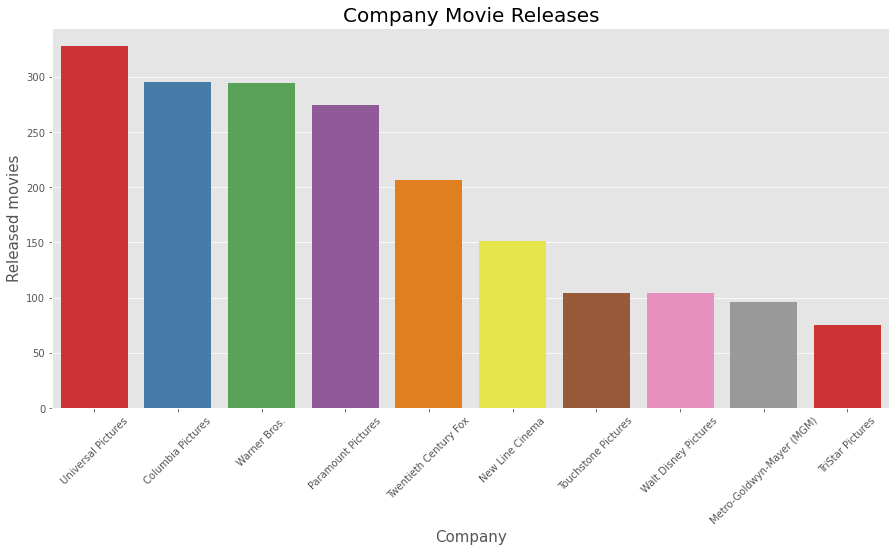

In [36]:
# Plotting the Companies with the most releases 

sns.barplot(x = company.index, y = company['company'] , palette="Set1")

# Lables and Titles

labels = company.index.tolist()
plt.gcf().set_size_inches(15, 7)
plt.title('Company Movie Releases', fontsize = 20)
plt.xlabel('Company', fontsize = 15)
plt.ylabel('Released movies', fontsize = 15)

# Defining the x-axis values to make it clear

plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9] , labels = labels, rotation = '45')

plt.show()

In [ ]:
# While Warner Bros. has the highest gross it released movies less than Columbia Pictures and Universal Pictures compared to 
# them it has more successful movies than them 

#### - Rating Comparison

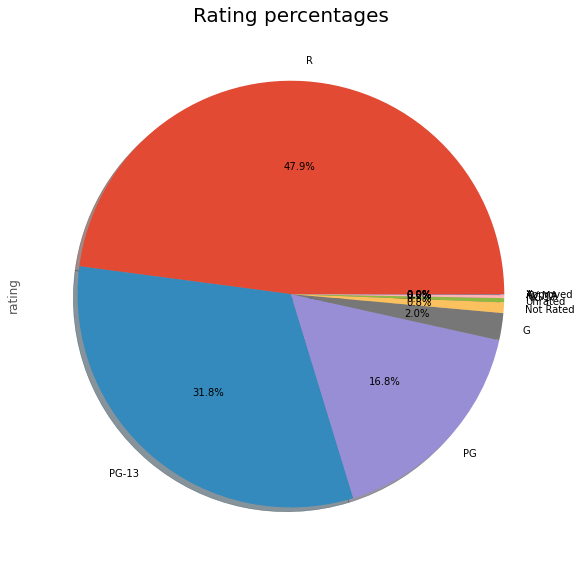

In [37]:
# Plotting the Rating comparison

df['rating'].value_counts().plot.pie(autopct = '%1.1f%%',shadow = True,figsize = (12,8))

plt.title('Rating percentages', fontsize = 20)
plt.tight_layout()
plt.show()

#### - Genre Comparison

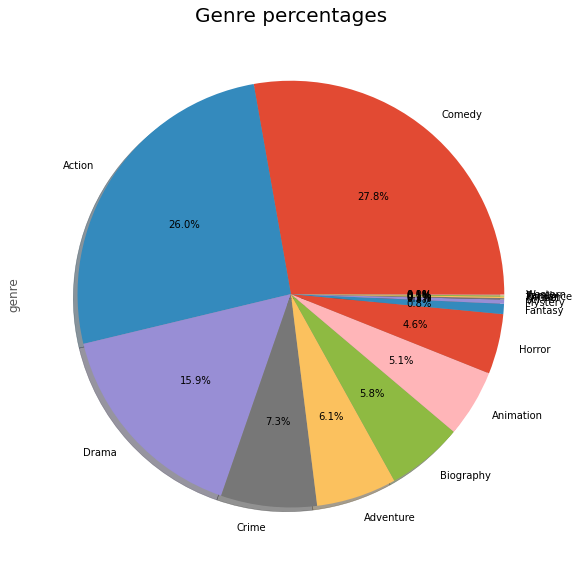

In [38]:
# Plotting the Genre comparison

df['genre'].value_counts().plot.pie(autopct = '%1.1f%%',shadow = True,figsize = (12,8))

plt.title('Genre percentages', fontsize = 20)
plt.tight_layout()
plt.show()

### IV - Conclusion


1. The studied time lapse goes from 1980 to 2020.
2. The average film duration is 2 h 33 min.
3. Highest counts for rating is R rated
4. Highest counts for genre is Comedy 
5. Woody Allen directed 33 movies 
6. Nicolas Cage made 39 movies
7. Most releases movies was in 2002 with 167 movies in one year
8. Shows us high correlation between budget and gross and some what high correlation between votes and gross
9. Show how the budget vs gross for each company and how they earned from there movies 
10. While Warner Bros. has the highest gross it released movies less than Columbia Pictures and Universal Pictures compared to them it has more successful movies than them 